For this project I will be analyzing 911 call data from a [Kaggle dataset](https://www.kaggle.com/mchirico/montcoalert), uploaded by Mike Chirico. This dataset contains 911 calls from Montgomery County, Pennsylvania.

Columns in the dataset:

* lat : String variable (Latitude)

* lng: String variable (Longitude)

* desc: String variable (Description of the Emergency Call)

* zip: String variable (Zipcode)

* title: String variable (Title)

* timeStamp: String variable (Time of call)

* twp: String variable (Township)

* addr: String variable (Address)

* e: String variable (Dummy variable)

## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
%matplotlib inline

In [3]:
calls = pd.read_csv('911.csv')

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
calls.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Create a new column called Call Reason to split up the 911 calls by type of emergency (EMS, traffic, and fire)**

** The title for each call has a type of emergency followed by a colon and the title code, so I used a .split() on the colons to get the department name for each call **

In [6]:
calls['Call Reason'] = calls['title'].apply(lambda title: title.split(':')[0])

** Count for each call reason **

In [7]:
calls['Call Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Call Reason, dtype: int64

** Plot with the value counts displayed for each type of emergency **

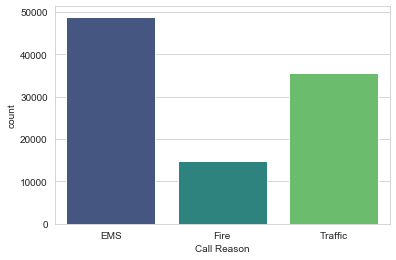

In [8]:
sb.countplot(x='Call Reason',data=calls,palette='viridis')

In [9]:
type(calls['timeStamp'].iloc[0])

str

** The timeStamp column is a string type so it must be converted to a datetime object in order to perform some analysis on it **

In [10]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

In [11]:
calls['Hours'] = calls['timeStamp'].apply(lambda time: time.hour)
calls['Months'] = calls['timeStamp'].apply(lambda time: time.month)
calls['Days'] = calls['timeStamp'].apply(lambda time: time.dayofweek)

In [12]:
type(calls['Days'].iloc[0])

numpy.int64

** Day of Week is an integer type so in order to display it on a plot I want to change it to a map with strings **

In [13]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [14]:
calls['Days'] = calls['Days'].map(days)

# Plots With 911 Call Data

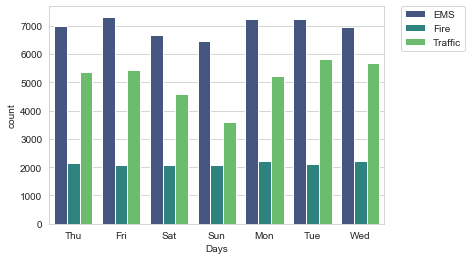

In [15]:
sb.countplot(x='Days',data=calls,hue='Call Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** This plot shows the number of calls for each type of emergency depending on the day of the week **

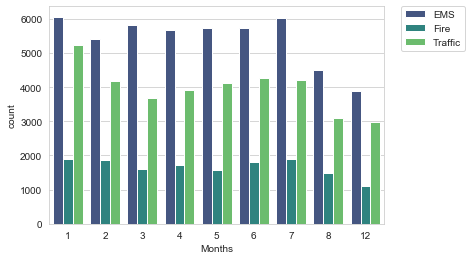

In [16]:
sb.countplot(x='Months',data=calls,hue='Call Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** This plot is missing months 9 through 11 so I am going to try another type of plot to display the data **

In [17]:
byMonth = calls.groupby('Months').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Call Reason,Hours,Days
Months,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


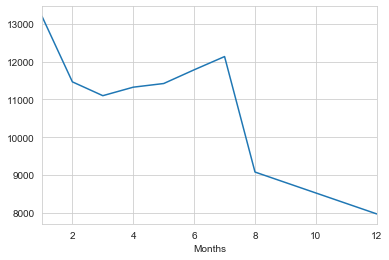

In [18]:
byMonth['Call Reason'].plot()

** This plot shows the number of calls each month regardless of the column it is set to **

In [19]:
calls['Date']=calls['timeStamp'].apply(lambda t: t.date())

** Created a Date column to display data on plots **

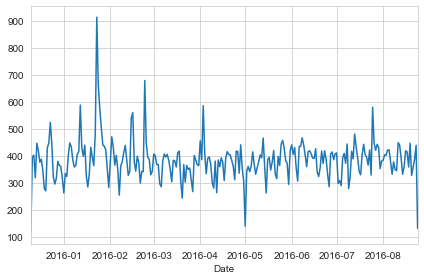

In [20]:
calls.groupby('Date').count()['Call Reason'].plot()
plt.tight_layout()

** The following plots are divided up by the three emergency types and they display the number of calls for each one on a given date **

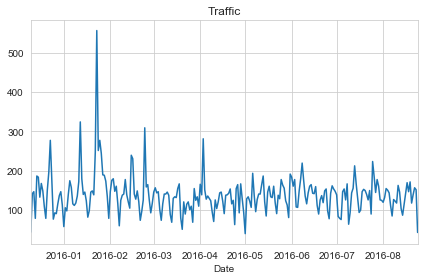

In [21]:
calls[calls['Call Reason']=='Traffic'].groupby('Date').count()['Call Reason'].plot()
plt.title('Traffic')
plt.tight_layout()

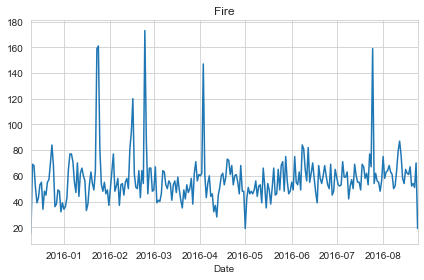

In [22]:
calls[calls['Call Reason']=='Fire'].groupby('Date').count()['Call Reason'].plot()
plt.title('Fire')
plt.tight_layout()

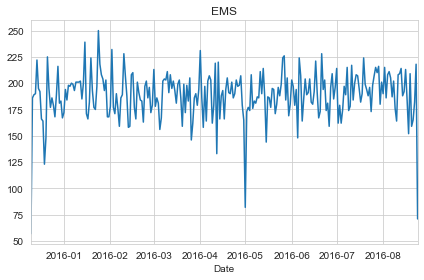

In [23]:
calls[calls['Call Reason']=='EMS'].groupby('Date').count()['Call Reason'].plot()
plt.title('EMS')
plt.tight_layout()

In [24]:
dayHour = calls.groupby(by=['Days','Hours']).count()['Call Reason'].unstack()
dayHour.head()

Hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Days,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Created a new dataframe that has the number of calls for each day of the week and each hour of the day andd a heatmap showing this data **

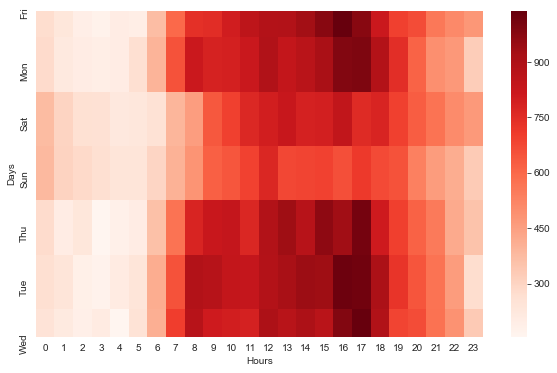

In [34]:
plt.figure(figsize=(10,6))
sb.heatmap(dayHour,cmap='Reds')

In [30]:
dayMonth = calls.groupby(by=['Days','Months']).count()['Call Reason'].unstack()
dayMonth.head()

Months,1,2,3,4,5,6,7,8,12
Days,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


** I created another dataframe that has the count for each day of the month using a groupby then used that dataframe to create another heatmap **

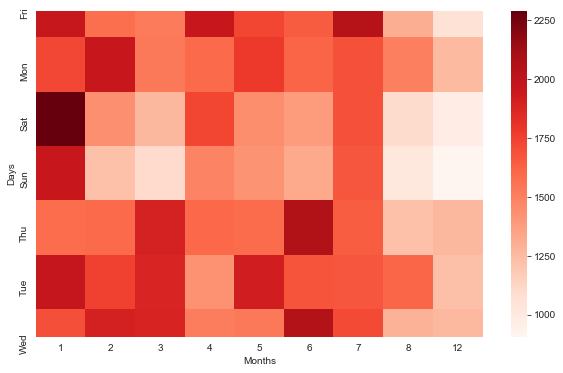

In [33]:
plt.figure(figsize=(10,6))
sb.heatmap(dayMonth,cmap='Reds')